データの日付を入力してください:  20231220
測定回数を入力してください(例:1):  5
マッキベンの種類を入力してください(4s or 4l or 6 or s or u):  s
データ1の圧力を入力してください:  2
データ2の圧力を入力してください:  3
データ3の圧力を入力してください:  4
データ4の圧力を入力してください:  5
データ5の圧力を入力してください:  6


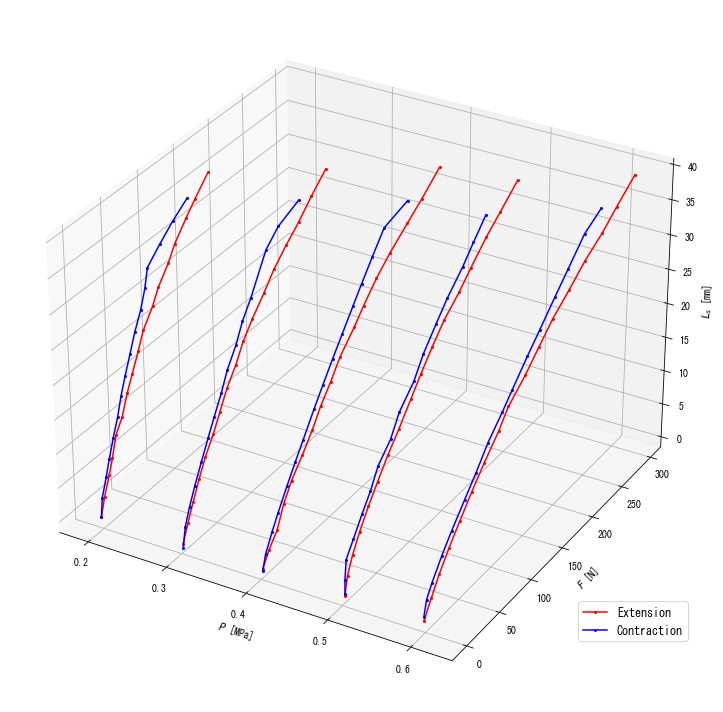

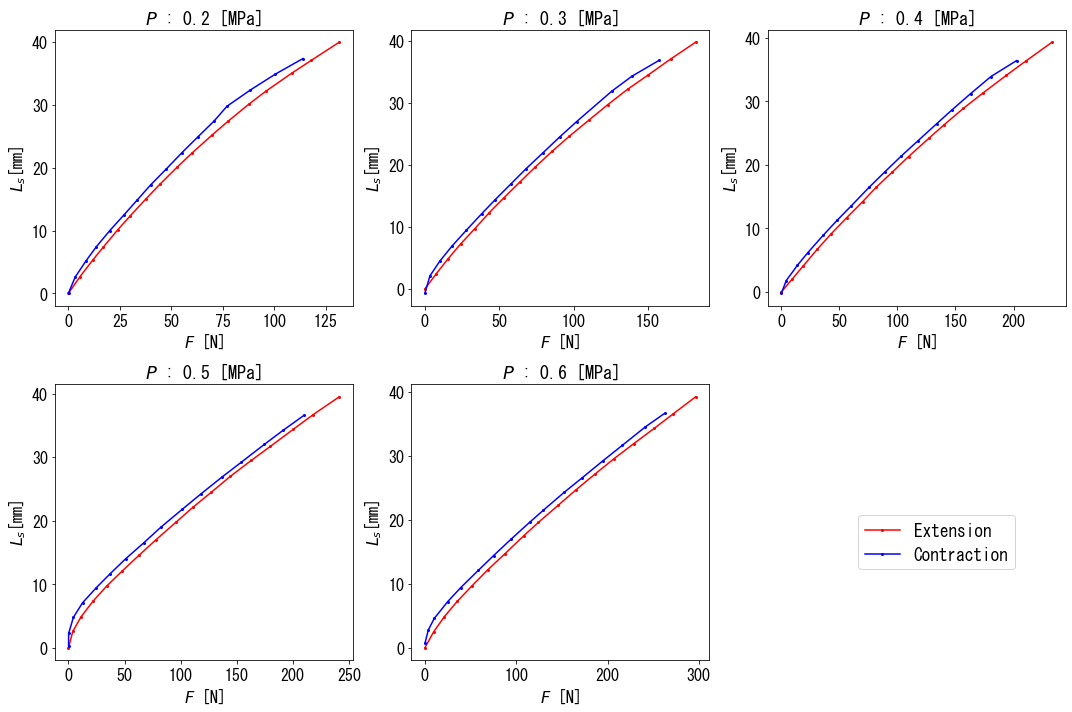

In [6]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FormatStrFormatter, MultipleLocator
from datetime import datetime
from matplotlib.ticker import FixedLocator

plt.rcParams['font.family'] = 'MS Gothic' #凡例やラベルに日本語を使っても文字化けしないようにする
current_date = datetime.now().strftime("%Y%m%d")

date = input("データの日付を入力してください: ")
count = input("測定回数を入力してください(例:1): ")  
measurement_kind = input("マッキベンの種類を入力してください(4s or 4l or 6 or s or u): ")  
pressure1 = input("データ1の圧力を入力してください: ")
pressure2 = input("データ2の圧力を入力してください: ")
pressure3 = input("データ3の圧力を入力してください: ")
pressure4 = input("データ4の圧力を入力してください: ")
pressure5 = input("データ5の圧力を入力してください: ")

pressure_with_decimal1 = f"0.{pressure1}" 
pressure_with_decimal2 = f"0.{pressure2}" 
pressure_with_decimal3 = f"0.{pressure3}" 
pressure_with_decimal4 = f"0.{pressure4}" 
pressure_with_decimal5 = f"0.{pressure5}" 


dt1 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal1}_se.csv")
dt2 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal2}_se.csv")
dt3 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal3}_se.csv")
dt4 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal4}_se.csv")
dt5 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal5}_se.csv")

#dt1 = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal1}_se.csv")
#dt2 = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal2}_se.csv")
#dt3 = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal3}_se.csv")
#dt4 = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal4}_se.csv")
#dt5 = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal5}_se.csv")


column1 = dt1[["Pressure","Length","Force"]]
column2 = dt2[["Pressure","Length","Force"]]
column3 = dt3[["Pressure","Length","Force"]]
column4 = dt4[["Pressure","Length","Force"]]
column5 = dt5[["Pressure","Length","Force"]]

combined_column = pd.concat([column1,column2,column3,column4,column5])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d') #例えば．(221, projection='3d')(222, projection='3d')(223, projection='3d')(224, projection='3d')とすれば，4つグラフを並べられる    

dt_list = [column1, column2, column3, column4, column5]

for i, column in enumerate(dt_list):
    pressure_values = column["Pressure"].values
    length_values = column["Length"].values
    force_values = column["Force"].values

    # Forceが最大値を取るまでの範囲を赤でプロット
    idx_max_force = column["Force"].idxmax()
    ax.plot(pressure_values[:idx_max_force + 1],force_values[:idx_max_force + 1], length_values[:idx_max_force + 1],c='r', marker='o', markersize=2)

    # Forceが最大値を取った後の範囲を青でプロット
    ax.plot(pressure_values[idx_max_force + 1:],  force_values[idx_max_force + 1:], length_values[idx_max_force + 1:],c='b', marker='o', markersize=2)

ax.set_xlabel('$P$ [MPa]')
ax.set_zlabel('$L_s$ [mm]')
ax.set_ylabel('$F$ [N]')

fig.legend(labels=['Extension', 'Contraction'], loc=(0.8,0.1), fontsize='large')


# 0.3から0.9まで0.1刻みの目盛りを設定
ax.set_xticks([0.2,0.3,0.4, 0.5, 0.6])

# 0.3から0.9までの範囲にx軸のグリッドを表示
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

# メモリの位置を調整
ax.xaxis.set_major_locator(MultipleLocator(0.1))

# グリッドの表示
ax.grid(True, which='both', linestyle='--', linewidth=0.5)


plt.tight_layout()

save_path = f'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\multi_se_Ls\\multi_Ls_{date}_{count}_{measurement_kind}_se-1.jpg'
#save_path = f'C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\multi_se\\multi_{date}_{count}_{measurement_kind}_se-1.jpg'
plt.savefig(save_path,bbox_inches='tight')


#以下2D

# 各データフレームの圧力を凡例用に取得
pressure1 = column1["Pressure"].iloc[0]
pressure2 = column2["Pressure"].iloc[0]
pressure3 = column3["Pressure"].iloc[0]
pressure4 = column4["Pressure"].iloc[0]
pressure5 = column5["Pressure"].iloc[0]

# サブプロットの設定
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 各データをプロット
dt_list = [column1, column2, column3, column4, column5]
for i, ax in enumerate(axes.flat):
    if i < len(dt_list):
        column = dt_list[i]
        
        # 最初のPressureデータを取得して四捨五入
        first_pressure= round(column["Pressure"].iloc[0], 2)
        
        # Forceが最大値を取るまでの範囲を赤でプロット
        ax.plot(column["Force"][:column["Force"].idxmax() + 1],column["Length"][:column["Force"].idxmax() + 1],  c='r', marker='o', markersize=2)

        # Forceが最大値を取った後の範囲を青でプロット
        ax.plot( column["Force"][column["Force"].idxmax() + 1:], column["Length"][column["Force"].idxmax() + 1:],c='b', marker='o', markersize=2)

        ax.set_ylabel('$L_s$[mm]', fontsize=16)
        ax.set_xlabel('$F$ [N]', fontsize=16)
        ax.set_title(f'$P$ : {first_pressure} [MPa]'.format(int(column["Pressure"].iloc[0])), fontsize=18)
        
        ax.tick_params(axis='x', labelsize=16)
        ax.tick_params(axis='y', labelsize=16)
        
    else:
        ax.axis('off')
        
# 凡例を追加
fig.legend(labels=['Extension', 'Contraction'], loc=(0.8,0.2), fontsize='xx-large')

plt.tight_layout()

# 保存パスとファイル名を指定してグラフを画像として保存（JPG形式）
save_path = f'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\multi_se_Ls\\multi_Ls_{date}_{count}_{measurement_kind}_se-2.jpg'
#save_path = f'C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\multi_se\\multi_{date}_{count}_{measurement_kind}_se-2.jpg'
plt.savefig(save_path,bbox_inches='tight')


## 